In [3]:
import pandas as pd

df = pd.read_csv("../data/raw/online_retail_II.csv", encoding="ISO-8859-1")




In [16]:
df.head()
df.shape
df.columns
df.info()
df.isnull().sum()


<class 'pandas.DataFrame'>
Index: 406830 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406830 non-null  str           
 1   StockCode    406830 non-null  str           
 2   Description  406830 non-null  str           
 3   Quantity     406830 non-null  int64         
 4   InvoiceDate  406830 non-null  datetime64[us]
 5   Price        406830 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      406830 non-null  str           
dtypes: datetime64[us](1), float64(2), int64(1), str(4)
memory usage: 27.9 MB


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [4]:
df.describe()


,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df[df["Quantity"] < 0].head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [7]:
df[df["Invoice"].str.contains("C", na=False)].head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [9]:
df["Customer ID"].isnull().sum()


np.int64(135080)

In [11]:
df[df["Customer ID"].isnull()].head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [12]:
df = df[df["Customer ID"].notnull()]


In [13]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [14]:
df["InvoiceDate"].min(), df["InvoiceDate"].max()


(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [18]:
df["Country"].value_counts(normalize=True)


Country
United Kingdom          0.889507
Germany                 0.023339
France                  0.020874
EIRE                    0.018398
Spain                   0.006226
Netherlands             0.005828
Belgium                 0.005086
Switzerland             0.004614
Portugal                0.003638
Australia               0.003095
Norway                  0.002669
Italy                   0.001974
Channel Islands         0.001863
Finland                 0.001708
Cyprus                  0.001529
Sweden                  0.001136
Austria                 0.000986
Denmark                 0.000956
Japan                   0.000880
Poland                  0.000838
USA                     0.000715
Israel                  0.000615
Unspecified             0.000600
Singapore               0.000563
Iceland                 0.000447
Canada                  0.000371
Greece                  0.000359
Malta                   0.000312
United Arab Emirates    0.000167
European Community      0.000150
RS

In [26]:
df["Revenue"] = df["Quantity"] * df["Price"]
df[["Revenue", "Quantity", "Price"]].head(2)

,Revenue,Quantity,Price
0,15.30,6,2.55
1,20.34,6,3.39


In [27]:
df["Revenue"].describe()

count    406830.000000
mean         20.401848
std         427.591192
min     -168469.600000
25%           4.200000
50%          11.100000
75%          19.500000
max      168469.600000
Name: Revenue, dtype: float64

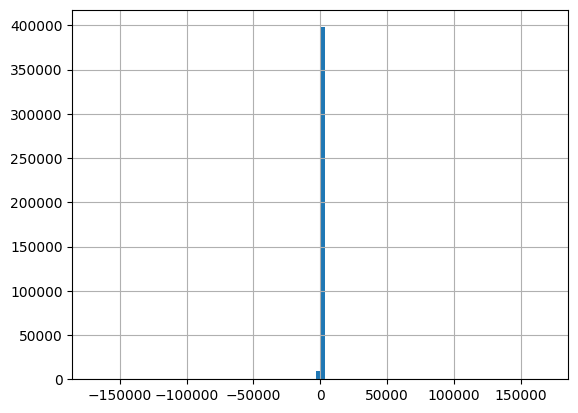

In [28]:
import matplotlib.pyplot as plt

df["Revenue"].hist(bins=100)
plt.show()

In [ ]:
max_row = df.loc[[df["Revenue"].idxmax()]]
max_row.head()





,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.6


In [34]:
min_row = df.loc[[df["Revenue"].idxmin()]]
min_row.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.6


In [35]:
customer_revenue = df.groupby("Customer ID")["Revenue"].sum()

customer_revenue.describe()

count      4372.000000
mean       1898.463818
std        8219.344627
min       -4287.630000
25%         293.362500
50%         648.075000
75%        1611.725000
max      279489.020000
Name: Revenue, dtype: float64

In [36]:
customer_revenue.sort_values(ascending=False).head(10)


Customer ID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: Revenue, dtype: float64

In [39]:
df = df[~df["Invoice"].str.startswith("C")]
df = df[df["Quantity"] > 0]
df = df[df["Price"] > 0]
df["Customer ID"] = df["Customer ID"].astype(int)
df["Revenue"] = df["Quantity"] * df["Price"]
df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")



In [44]:

order_revenue = df.groupby("Invoice")["Revenue"].sum()
order_revenue.mean()
customer_revenue = df.groupby("Customer ID")["Revenue"].sum()


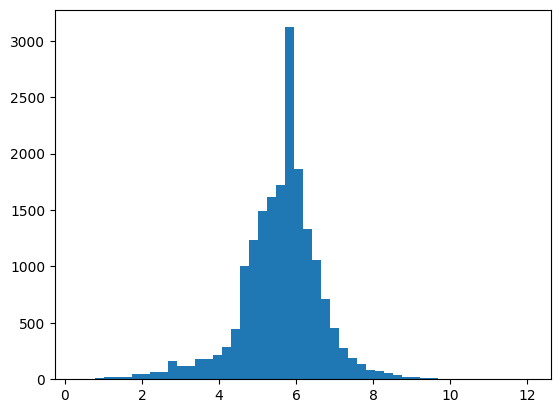

In [49]:
import numpy as np

plt.hist(np.log1p(order_revenue), bins=50)
plt.show()

In [51]:
df["CohortMonth"] = df.groupby("Customer ID")["InvoiceDate"].transform("min").dt.to_period("M")
df["CohortMonth"].head()

0    2010-12
1    2010-12
2    2010-12
3    2010-12
4    2010-12
Name: CohortMonth, dtype: period[M]